### 1.Defining the Question

#### Data Analytic Question

> Determine which individuals are most likely to have or use a bank account.

###1.Importing Libraries and Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Financial Dataset - 1.csv')

###2.Previewing the Dataset

In [ ]:
#checking number of records
df.shape

(23524, 13)

In [ ]:
#head
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#tail
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [ ]:
#checking the data types
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

### 3.Tyding the dataset

In [ ]:
# Rectifying the column names
df.columns= df.columns.str.replace(' ','_')
df.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The_relathip_with_head', 'marital_status',
       'Level_of_Educuation', 'Type_of_Job'],
      dtype='object')

In [ ]:
#checking for null values
df.isnull().sum()
df = df.dropna()

df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has_a_Bank_account        0
Type_of_Location          0
Cell_Phone_Access         0
household_size            0
Respondent_Age            0
gender_of_respondent      0
The_relathip_with_head    0
marital_status            0
Level_of_Educuation       0
Type_of_Job               0
dtype: int64

In [ ]:
#checking for duplicate values
df.duplicated().sum()

0

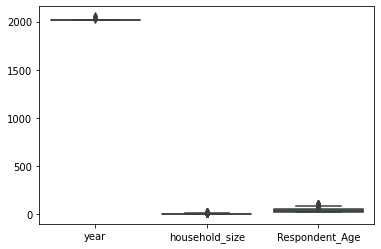

In [ ]:
#checking for outliers
sns.boxplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


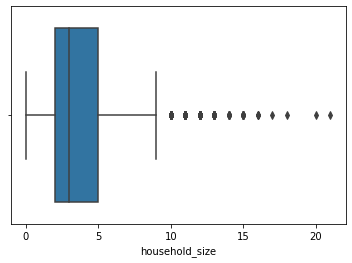

In [ ]:
sns.boxplot(df['household_size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


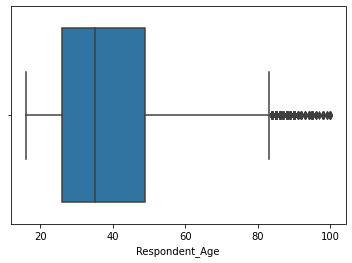

In [ ]:
sns.boxplot(df['Respondent_Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


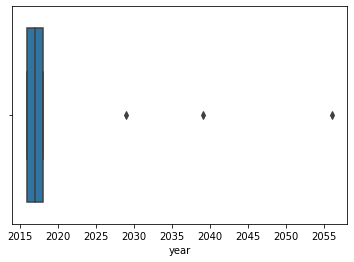

In [ ]:
sns.boxplot(df['year'])

In [ ]:
def iqr_outlier(df,column):
  q1, q3 = np.percentile(df[column], [25, 75]) 
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  df=df[~(df[column]>upper_bound)]
  
  return sns.boxplot(df[column])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


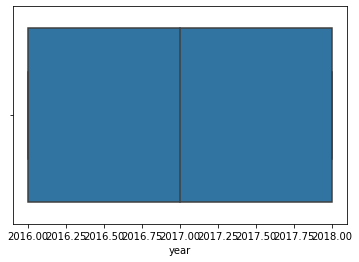

In [ ]:
iqr_outlier(df,'year')

In [ ]:
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


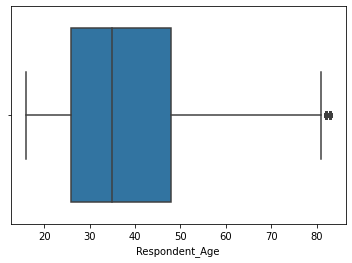

In [ ]:
iqr_outlier(df,'Respondent_Age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


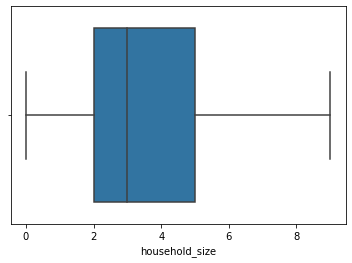

In [ ]:
iqr_outlier(df,'household_size')

In [ ]:
df.shape

(23343, 13)

###4.Exploratory Analysis

####4.1.Univariate Analysis

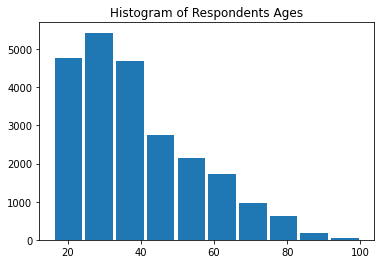

In [ ]:
#Histogram of respondent ages
plt.hist(df['Respondent_Age'], bins=10, histtype='bar', rwidth=0.9)

#plt.xlabel('x')
#plt.ylabel('y')
plt.title('Histogram of Respondents Ages') 
plt.show()

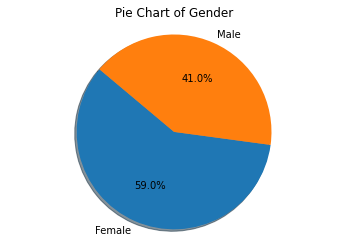

In [ ]:
#Pie chart representation of Gender
gender = df['gender_of_respondent'].value_counts()
labels =df['gender_of_respondent'].unique()

plt.pie(gender, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Gender')
plt.show()

In [ ]:
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [ ]:
year = df['year'].value_counts()

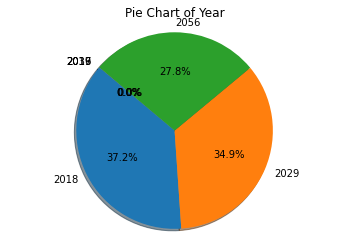

In [ ]:
#Pie chart representation of how the years were distributed

year = df['year'].value_counts()
labels =df['year'].unique()
# colors = ['gold', 'yellowgreen', 'lightcoral']


plt.pie(year, labels = labels,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Year')
plt.show()

In [ ]:
df.describe()

,year,household_size,Respondent_Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


####4.2.Bivariate Analysis

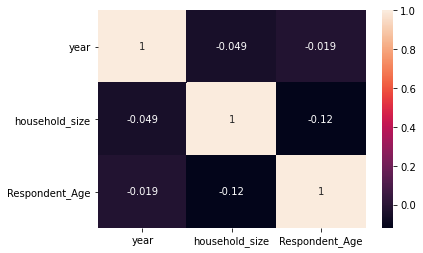

In [ ]:
#Checking on our data correlation using a heat map

sns.heatmap(df.corr(),annot=True)
plt.show()

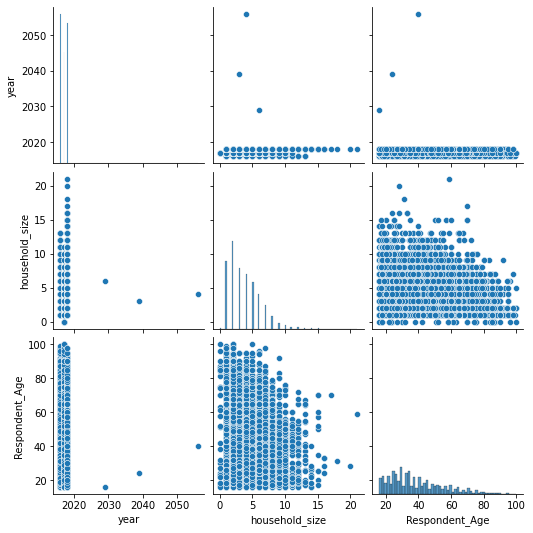

In [ ]:
#Plotting bivariate summaries
sns.pairplot(df)
plt.show()

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The_relathip_with_head', 'marital_status',
       'Level_of_Educuation', 'Type_of_Job'],
      dtype='object')

In [ ]:
#Representing type of job of respondents with and with no bank accounts
def stackbar(df,column):
  with_acc=df[[column,'uniqueid']][df['Has_a_Bank_account']=='Yes']
  with_acc = with_acc.groupby([column]).count()

  wout_acc=df[[column,'uniqueid']][df['Has_a_Bank_account']=='No']
  wout_acc = wout_acc.groupby([column]).count()
   

  with_acc.rename(columns = {'uniqueid':'Yes'}, inplace = True)
  wout_acc.rename(columns = {'uniqueid':'No'}, inplace = True)


#merge the two to come up with a dataset with both volumns
  df2 = pd.merge(with_acc,wout_acc, right_on=column,left_on=column)
  df2

  color = ["green",'orange']

#plot
  df2.plot(kind='bar', figsize=(8, 6), color=color,stacked=True)
  plt.title(column + " vs Bank Accounts", fontsize=14, y=1.015)
  plt.ylabel='Ratio of Bank Acoounts'
  plt.xlabel=(column)
  return(plt.show())


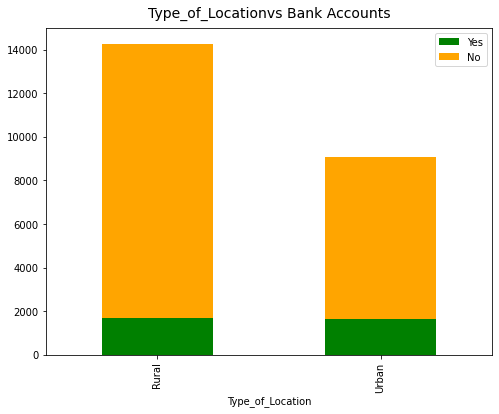

In [ ]:
#Representing location of respondents with and with no bank accounts

stackbar(df,'Type_of_Location')

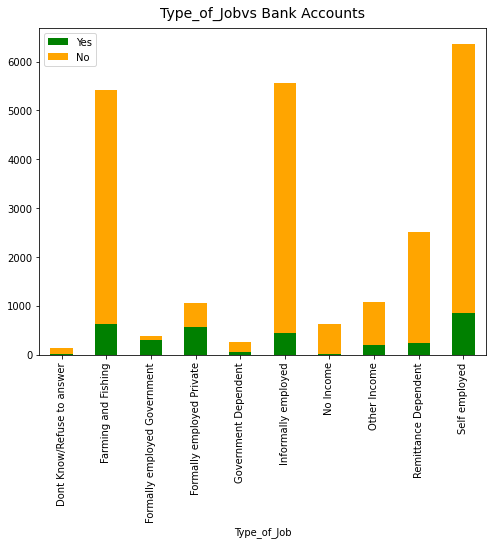

In [ ]:
#Representing type of job of respondents with and with no bank accounts
stackbar(df,'Type_of_Job')


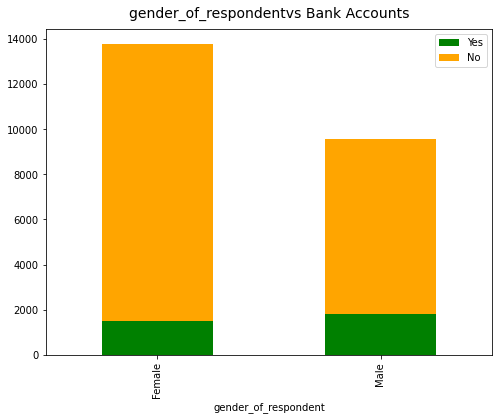

In [ ]:
stackbar(df,'gender_of_respondent')

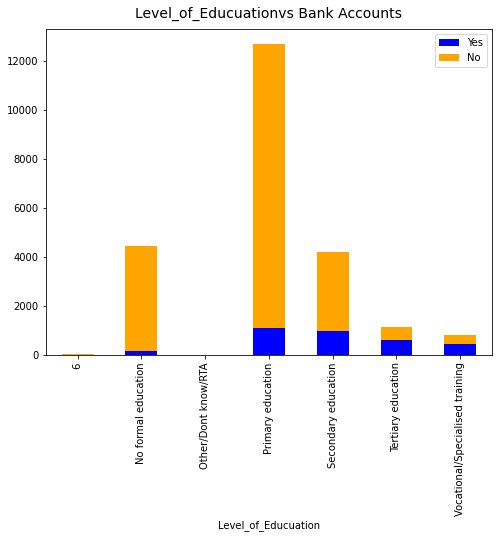

In [ ]:
stackbar(df,'Level_of_Educuation')

In [ ]:
# zscore

from scipy import stats
print("Household_size zscore" ,stats.zscore(df['household_size']))
print("Respondent_Age zscore" ,stats.zscore(df['Respondent_Age']))


Household_size zscore [-0.30188629  0.57487037  0.57487037 ...  0.57487037  1.45162703
  2.76676201]
Respondent_Age zscore [-0.89624712  1.88834928 -0.77517771 ... -0.71464301 -0.53303889
 -1.13838594]


In [ ]:
#Computing ttest 

from scipy.stats import ttest_1samp

x = df['household_size']
expected_mean = 0

tx_statistic, p_value = ttest_1samp(x, expected_mean, axis = 0)
print('Household_size t-test is ',tx_statistic)


y = df['Respondent_Age']
expected_mean = 0

ty_statistic, p_value = ttest_1samp(y, expected_mean, axis = 0)

print('Respondent Age t-test is ',ty_statistic)


Household_size t-test is  247.04994745153752
Respondent Age t-test is  358.8945338556559


In [ ]:
#computing ttest for two independent samples

from scipy.stats import ttest_ind

x = df['household_size']
y = df['Respondent_Age']

# Then calculating the t-test
t_statistic, p_value = ttest_ind(x, y)

# Then displaying the t-statistic
t_statistic

-321.7270468155308

####4.3.Multivariate Analysis

##### Principle Component Analysis

In [ ]:
df_pca= df
df_pca.head(1)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


In [ ]:
# Drop uneccessary columns
df_pca = df_pca.drop('uniqueid',axis= 1)

In [ ]:
#Label encode the dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_pca.country=le.fit_transform(df_pca.country)
df_pca['year']=le.fit_transform(df_pca['year'])
df_pca['Type_of_Location']=le.fit_transform(df_pca['Type_of_Location'])
df_pca['Cell_Phone_Access']=le.fit_transform(df_pca['Cell_Phone_Access'])
df_pca['household_size']=le.fit_transform(df_pca['household_size'])
df_pca['Respondent_Age']=le.fit_transform(df_pca['Respondent_Age'])
df_pca['gender_of_respondent']=le.fit_transform(df_pca['gender_of_respondent'])
df_pca['The_relathip_with_head']=le.fit_transform(df_pca['The_relathip_with_head'])
df_pca['marital_status']=le.fit_transform(df_pca['marital_status'])
df_pca['Level_of_Educuation']=le.fit_transform(df_pca['Level_of_Educuation'])
df_pca['Type_of_Job']=le.fit_transform(df_pca['Type_of_Job'])


In [ ]:
#dividing the dataset into feature and label
x = df_pca.drop('Has_a_Bank_account', axis=1)
y = df_pca['Has_a_Bank_account']

In [ ]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.17660038, 0.15322211, 0.14147392, 0.10120044, 0.08912789,
       0.07617899, 0.0696338 , 0.0598444 , 0.05193735, 0.04220974,
       0.03857097])

In [ ]:
#Using 1 Principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [ ]:
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [ ]:
#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


###### PCA 2 components

In [ ]:
#1.dividing the dataset into feature and label
x = df_pca.drop('Has_a_Bank_account',axis= 1)
y = df_pca['Has_a_Bank_account']

#2.splitting dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#3. Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#4. Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#5. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

#6. Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

#7. Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



['No' 'No' 'No' ... 'No' 'No' 'No']
[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


###### PCA on 3 components

In [ ]:
# Trying with 3 components
#1.dividing the dataset into feature and label
x = df_pca.drop('Has_a_Bank_account',axis= 1)
y = df_pca['Has_a_Bank_account']

#2.splitting dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#3. Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#4. Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#5. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

#6. Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

#7. Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


['No' 'No' 'No' ... 'No' 'No' 'No']
[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965
